# 필요 라이브러리 불러오기

## 라이브러리 불러오기 전
- pip install opencv-python 을 입력하여 설치하기

In [1]:
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.models import Model

import numpy as np
import pandas as pd

import cv2
from IPython.display import Image
from os import listdir as ld

#이미지를 불러오기 위해 필요한 package
import keras.utils as utils

# 필요 모델 들고오기 - VGG16

In [2]:
vgg_model = VGG16(weights='imagenet', include_top=False)

## 마지막 컨볼루션 레이어의 출력으로 새 모델 생성

In [3]:
# Create a new model with the output of the last convolutional layer
model = Model(inputs=vgg_model.input, outputs=vgg_model.get_layer('block5_pool').output)

In [4]:
#이미지를 불러오기 위해 필요한 package
import keras.utils as utils

# 기준이 될 이미지 불러오기
- 첫 번째 이미지를 로드하고 VGG용으로 사전 처리

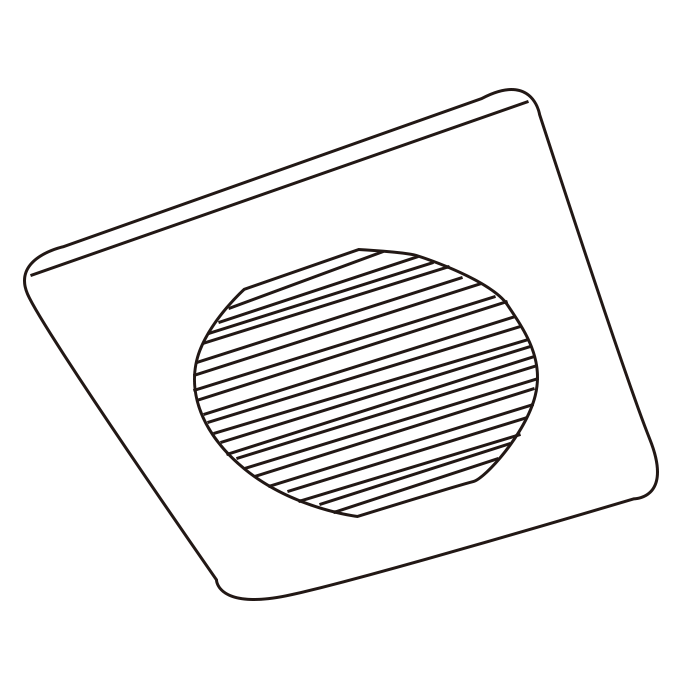

In [21]:
Image("C:\\Users\\admin\\Desktop\\dataset\\2 Data\\main.png")

In [22]:
# Load the first image and preprocess it for VGG
img1 = utils.load_img("C:\\Users\\admin\\Desktop\\dataset\\2 Data\\main.png", target_size=(224, 224))
img1 = utils.img_to_array(img1)
img1 = np.expand_dims(img1, axis=0)
img1 = preprocess_input(img1)



## 첫 번째 이미지에서 형상 추출

In [23]:
# Extract features from the first image
features1 = model.predict(img1)
features1 = features1.flatten()

1/1 [==============================] - 0s 197ms/step


# 비교 이미지(positive)불러오기

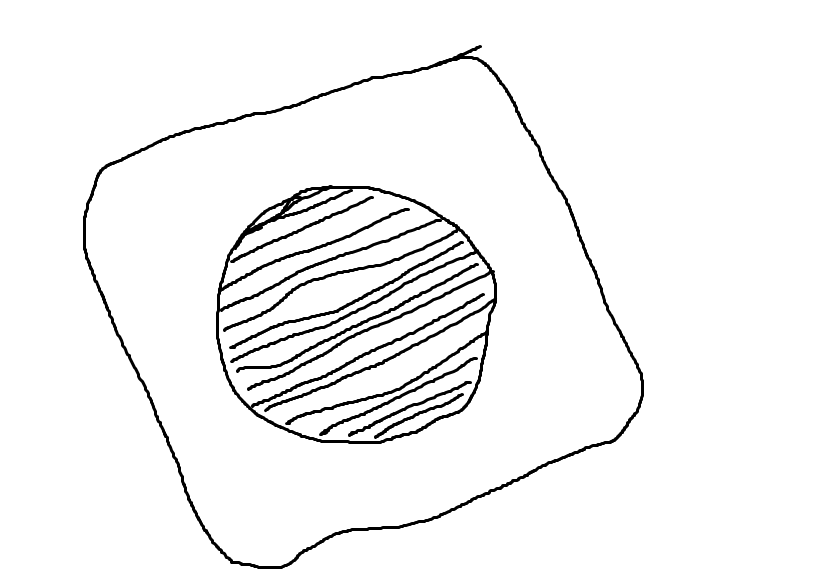

In [24]:
Image("C:\\Users\\admin\\Desktop\\제목 없음.png")

In [26]:
# Load the second image and preprocess it for VGG
img2 = utils.load_img("C:\\Users\\admin\\Desktop\\제목 없음.png", target_size=(224, 224))
img2 = utils.img_to_array(img2)
img2 = np.expand_dims(img2, axis=0)
img2 = preprocess_input(img2)

In [27]:
# Extract features from the second image
features2 = model.predict(img2)
features2 = features2.flatten()

1/1 [==============================] - 0s 144ms/step


In [28]:
# Calculate the cosine similarity between the two feature vectors
cosine_similarity = np.dot(features1, features2) / (np.linalg.norm(features1) * np.linalg.norm(features2))

## positive image cosine similarity

In [29]:
print("Cosine similarity: ", cosine_similarity)

Cosine similarity:  0.4094887


# 비교 이미지(negative) 불러오기

In [ ]:
Image("C:\\Users\\admin\Desktop\\새 폴더 (2)\\2배기\부정\\s_0038_24887_620467.jpg")

In [18]:
# Load the second image and preprocess it for VGG
img2 = utils.load_img("C:\\Users\\admin\Desktop\\새 폴더 (2)\\2배기\부정\\s_0038_24887_620467.jpg", target_size=(224, 224))
img2 = utils.img_to_array(img2)
img2 = np.expand_dims(img2, axis=0)
img2 = preprocess_input(img2)

In [19]:
# Extract features from the second image
features2 = model.predict(img2)
features2 = features2.flatten()

1/1 [==============================] - 0s 189ms/step


In [16]:
# Calculate the cosine similarity between the two feature vectors
cosine_similarity = np.dot(features1, features2) / (np.linalg.norm(features1) * np.linalg.norm(features2))

## negative

In [17]:
print("Cosine similarity: ", cosine_similarity)

Cosine similarity:  0.32039773


# 함수

In [30]:
def cos_sim(list, mod='positive'):
    positive_sim=[]
    negative_sim=[]
    
    for i in (list):
        img2 = utils.load_img(i, target_size = (224, 224))
        img2 = utils.img_to_array(img2)
        img2 = np.expand_dims(img2, axis=0)
        img2 = preprocess_input(img2)
        
        features2 = model.predict(img2)
        features2 = features2.flatten()
        cos_similarity = np.dot(features1, features2) / (np.linalg.norm(features1) * np.linalg.norm(features2))
        
        if mod == 'positive':
            positive_sim.append(cos_similarity)
            
        elif mod == 'negative':
            negative_sim.append(cos_similarity)
            
        else:
            print('함수 잘못 사용함')
            
    if mod == 'positive':
        print('POSITIVE')
        posi_sim_df = pd.DataFrame(positive_sim)
        print('최대 유사도: %.2f, 최소 유사도: %.2f, 평균 유사도: %.2f, 중앙 유사도: %.2f' %(max(positive_sim), min(positive_sim),
                                                                   (sum(positive_sim)/len(positive_sim)), posi_sim_df.median(axis=0)))
        
        posi_sim_df.to_csv('positive.csv')
        return posi_sim_df
    else:
        print('NEGATIVE')
        nega_sim_df = pd.DataFrame(negative_sim)
        print('최대 유사도: %.2f, 최소 유사도: %.2f, 평균 유사도: %.2f, 중앙 유사도: %.2f' %(max(negative_sim), min(negative_sim),
                                                                   (sum(negative_sim)/len(negative_sim)), nega_sim_df.median(axis=0)))
        nega_sim_df.to_csv('negative.csv')
        return nega_sim_df

In [31]:
nega_dir = 'C:\\Users\\admin\\Desktop\\dataset\\2 Data\\Negative'
posi_dir = 'C:\\Users\\admin\\Desktop\\dataset\\2 Data\\data augmentation'

nega_list = [nega_dir+'\\'+f for f in(ld(nega_dir))]
posi_list = [posi_dir+'\\'+f for f in(ld(posi_dir))]

In [32]:
print(nega_list[0])
print(posi_list[0])

C:\Users\admin\Desktop\dataset\2 Data\Negative\0.jpg
C:\Users\admin\Desktop\dataset\2 Data\data augmentation\0.png


In [33]:
cos_sim(nega_list, 'negative')

1/1 [==============================] - 0s 179ms/step
NEGATIVE
최대 유사도: 0.54, 최소 유사도: 0.14, 평균 유사도: 0.26, 중앙 유사도: 0.23


,0
0,0.231036
1,0.143448
2,0.185979
3,0.210785
4,0.241406
...,...
106,0.310683
107,0.303857
108,0.396664
109,0.514561


In [34]:
cos_sim(posi_list)

1/1 [==============================] - 0s 171ms/step
POSITIVE
최대 유사도: 0.53, 최소 유사도: 0.27, 평균 유사도: 0.40, 중앙 유사도: 0.40


,0
0,0.500811
1,0.506939
2,0.510082
3,0.516762
4,0.382741
...,...
591,0.473880
592,0.337204
593,0.410353
594,0.501605


# 완전 다른 이미지01

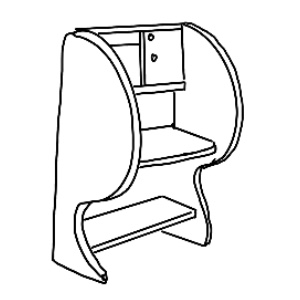

In [46]:
Image('C:/Users/admin/Desktop/simpic/6.jpg')

In [47]:
# Load the second image and preprocess it for VGG
img2 = image.load_img('C:/Users/admin/Desktop/simpic/6.jpg', target_size=(224, 224))
img2 = image.img_to_array(img2)
img2 = np.expand_dims(img2, axis=0)
img2 = preprocess_input(img2)

In [48]:
# Extract features from the second image
features2 = model.predict(img2)
features2 = features2.flatten()

1/1 [==============================] - 0s 136ms/step


In [49]:
# Calculate the cosine similarity between the two feature vectors
cosine_similarity = np.dot(features1, features2) / (np.linalg.norm(features1) * np.linalg.norm(features2))

In [50]:
print("Cosine similarity: ", cosine_similarity)

Cosine similarity:  0.21409264


# 완전 다른 이미지 02

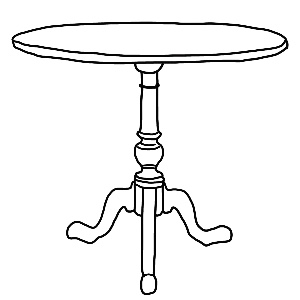

In [51]:
Image('C:/Users/admin/Desktop/simpic/8.jpg')

In [52]:
# Load the second image and preprocess it for VGG
img2 = image.load_img('C:/Users/admin/Desktop/simpic/8.jpg', target_size=(224, 224))
img2 = image.img_to_array(img2)
img2 = np.expand_dims(img2, axis=0)
img2 = preprocess_input(img2)

In [53]:
# Extract features from the second image
features2 = model.predict(img2)
features2 = features2.flatten()

1/1 [==============================] - 0s 134ms/step


In [54]:
# Calculate the cosine similarity between the two feature vectors
cosine_similarity = np.dot(features1, features2) / (np.linalg.norm(features1) * np.linalg.norm(features2))

In [55]:
print("Cosine similarity: ", cosine_similarity)

Cosine similarity:  0.16533415


# 완전 다른 이미지03

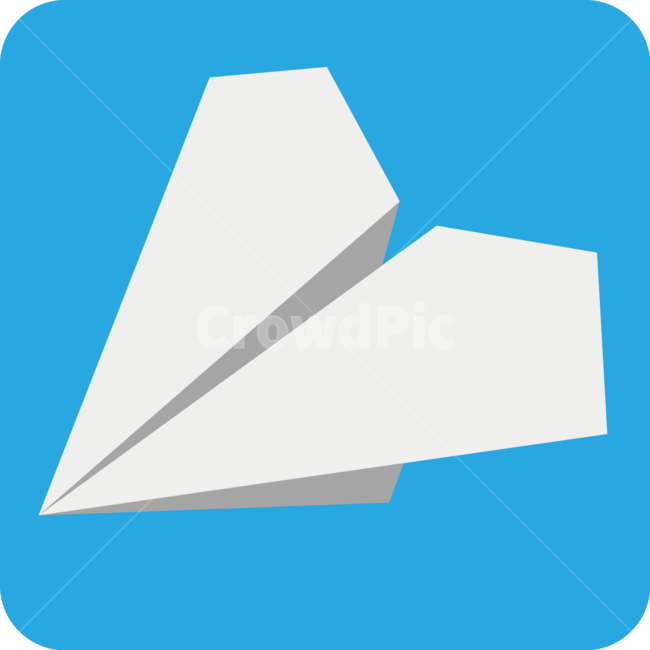

In [57]:
Image('C:/Users/admin/Desktop/simpic/9.png')

In [58]:
# Load the second image and preprocess it for VGG
img2 = image.load_img('C:/Users/admin/Desktop/simpic/9.png', target_size=(224, 224))
img2 = image.img_to_array(img2)
img2 = np.expand_dims(img2, axis=0)
img2 = preprocess_input(img2)

In [59]:
# Extract features from the second image
features2 = model.predict(img2)
features2 = features2.flatten()

1/1 [==============================] - 0s 310ms/step


In [60]:
# Calculate the cosine similarity between the two feature vectors
cosine_similarity = np.dot(features1, features2) / (np.linalg.norm(features1) * np.linalg.norm(features2))

In [61]:
print("Cosine similarity: ", cosine_similarity)

Cosine similarity:  0.14307235
